In [1]:
import sys
import time
import subprocess

In [2]:
%%time
Ps = [1, 2, 4, 8]
cmd = ['mpiexec', '-n', None, sys.executable, 'n-body-mpi.py']
runtimes = []
for P in Ps:
    print("running", P, end=" ")
    cmd[2] = str(P+1)
    start = time.time()
    subprocess.call(cmd)
    stop = time.time()
    runtimes.append(stop - start)
    print(runtimes[-1])
print(runtimes)

running 1 23.644402980804443
running 2 16.851896286010742
running 4 17.527660608291626
running 8 24.41919255256653
[23.644402980804443, 16.851896286010742, 17.527660608291626, 24.41919255256653]
CPU times: user 7.53 ms, sys: 7.76 ms, total: 15.3 ms
Wall time: 1min 22s


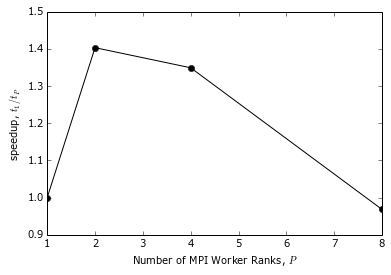

In [15]:
rts = runtimes[0] / np.array(runtimes) 
plt.plot(Ps, rts, 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('speedup, $t_1/t_P$')
plt.savefig('n-body-mpi-speedup.svg')

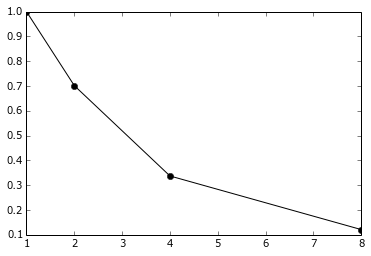

In [10]:
plt.plot(Ps, rts / Ps, 'ko-')

In [11]:
rts

array([ 1.        ,  1.40307076,  1.34897654,  0.96827129])

In [12]:
rts[1:] / rts[:-1]

array([ 1.40307076,  0.96144583,  0.71778215])

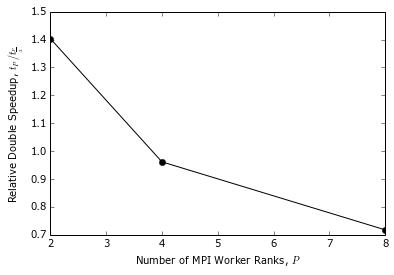

In [16]:
plt.plot(Ps[1:], rts[1:] / rts[:-1], 'ko-')
plt.xlabel('Number of MPI Worker Ranks, $P$')
plt.ylabel('Relative Double Speedup, $t_P/t_{\\frac{P}{2}}$')
#plt.savefig('n-body-mpi-double-speedup.svg')

In [17]:
runtimes[0]/4.288378953933716

5.51359924922575